In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as rnd

In [2]:
data = pd.read_csv('data/X_train.csv', index_col='PassengerId')

In [3]:
y = data["Survived"]
X = data.drop('Survived', axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [31]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
logreg_acc

0.7988826815642458

In [7]:
(pd.DataFrame(logreg.coef_, index=['Correlation'], columns=X.columns).
 T.sort_values(by='Correlation', ascending=False))

,Correlation
Sex,1.061005
status_Mrs,0.549942
status_Miss,0.511063
Embarked,0.297755
Fare,0.191248
Age,0.154912
label_none,0.152602
cabin_type_D,0.094833
cabin_type_E,0.094772
cabin_type_B,0.069415


### Support Vector Machines

In [8]:
from sklearn.svm import SVC, LinearSVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.7094972067039106

### KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

gs = GridSearchCV(KNeighborsClassifier(n_jobs=-1),
                  param_grid={'n_neighbors': range(1, 40, 2),
                              'weights': ['uniform', 'distance'],
                              'p': [1, 2, 3], 
                              'leaf_size': [10, 20, 30, 40, 50]},
                  cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [17]:
print(f'accuracy - {accuracy_score(y_test, gs.predict(X_test))}')

accuracy - 0.8156424581005587


In [18]:
gs.best_params_

{'leaf_size': 10, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

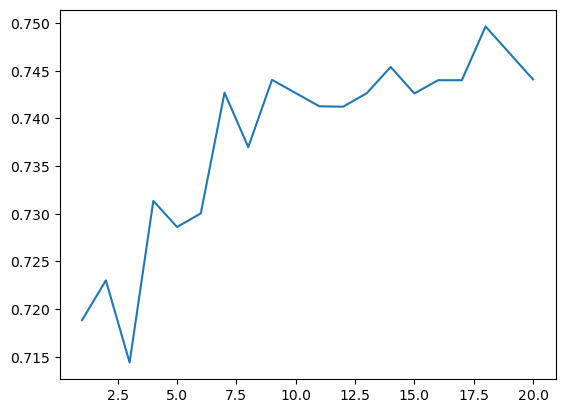

In [34]:
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt


def train_grid_search(X, y):
    
    grid_searcher = GridSearchCV(KNeighborsClassifier(**{'leaf_size': 10, 
                                                         'p': 1, 
                                                         'weights': 'distance'}),
                             param_grid={'n_neighbors': range(1, 21)},
                             cv=KFold(n_splits=20, random_state=10, shuffle=True), 
                             n_jobs=-1,)
    grid_searcher.fit(X, y)
    return grid_searcher.cv_results_['mean_test_score']

plt.plot(np.arange(1, 21), train_grid_search(X_train, y_train))

In [33]:
knn = KNeighborsClassifier(n_neighbors=19, **{'leaf_size': 10, 
                                              'p': 1, 
                                              'weights': 'distance'})
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.8100558659217877

### GaussianNB

In [73]:
from sklearn.naive_bayes import GaussianNB


gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaussian_acc = accuracy_score(y_test, y_pred)
gaussian_acc

0.7541899441340782

### Perceptron

In [74]:
from sklearn.linear_model import Perceptron


perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron_acc = accuracy_score(y_test, y_pred)
perceptron_acc

0.7932960893854749

### Linear SVC

In [75]:
from sklearn.svm import SVC, LinearSVC


linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_acc = accuracy_score(y_test, y_pred)
linear_svc_acc

C:\Users\user\.conda\envs\py310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8324022346368715

### Stochastic Gradient Descent

In [76]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, y_pred)
sgd_acc

0.8324022346368715

### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
acc_decision_tree

0.8268156424581006

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
acc_random_forest

0.8491620111731844

### Градиентный бустинг

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [80]:
gbdt = GradientBoostingClassifier(random_state=123)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

In [81]:
param_grid = {
    "max_depth": [2, 3],
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    # "min_child_weight":[4, 5, 6],
    "subsample": [0.7, 0.8, 0.9]
}

In [82]:
CV_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)

In [83]:
CV_gbdt.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV 1/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 1/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.798 total time=   0.0s
[CV 2/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 2/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.764 total time=   0.0s
[CV 3/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 3/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.803 total time=   0.0s
[CV 4/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 4/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.758 total time=   0.0s
[CV 1/4; 2/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 1/4; 2/54] END learning_rate=0.01, max_depth=

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3], 'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1000)

In [84]:
CV_gbdt.best_score_

0.8075842696629214

In [85]:
bp = CV_gbdt.best_params_
bp

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

In [86]:
from sklearn.metrics import accuracy_score


gbc = GradientBoostingClassifier(random_state=123, 
                                 **bp)
gbc.fit(X_train, y_train)

print(f"Accuracy на тренировочной выборке - {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Accuracy на тестовой выборке - {accuracy_score(y_test, gbc.predict(X_test))}")

Accuracy на тренировочной выборке - 0.8735955056179775
Accuracy на тестовой выборке - 0.8603351955307262


### Рандом форест

In [87]:
from sklearn.ensemble import RandomForestClassifier

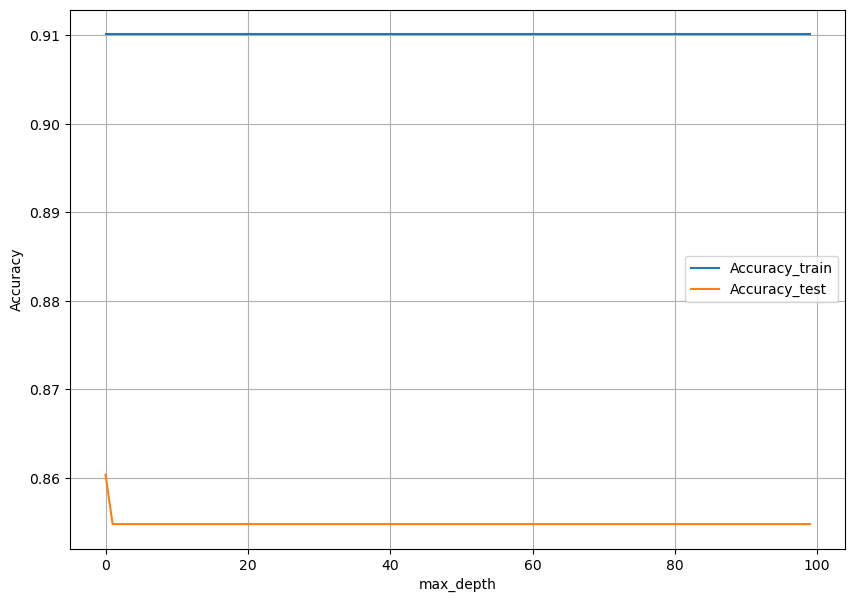

In [88]:
max_depth = 150
train_loss = []
test_loss = []

for i in range(50, max_depth):
    rf = RandomForestClassifier(n_estimators=i, max_depth=15, random_state=123, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_loss.append(accuracy_score(y_train, rf.predict(X_train)))
    test_loss.append(accuracy_score(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(train_loss, label = 'Accuracy_train')
plt.plot(test_loss, label = 'Accuracy_test')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend();

In [89]:
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              "n_estimators": [50, 100, 400, 700, 1000]}

rf = RandomForestClassifier(random_state=123, n_jobs=-1)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

CVrf = GridSearchCV(estimator=rf, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)
CVrf.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV 1/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.792 total time=   3.1s
[CV 2/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.787 total time=   0.0s
[CV 3/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.815 total time=   0.0s
[CV 4/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.758 total time=   0.0s
[CV 1/4; 2/150] START criterion=gini, min_samples_lea

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             scoring='accuracy', verbose=1000)

In [90]:
CVrf.best_score_

0.800561797752809

In [91]:
CVrf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 100}

In [97]:
rfc = RandomForestClassifier(max_depth=9, **{'criterion': 'entropy',
                                             'min_samples_leaf': 1,
                                             'min_samples_split': 16,
                                             'n_estimators': 300})
rfc.fit(X_train, y_train)

print(f"Accuracy_train: {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Accuracy_test: {accuracy_score(y_test, rfc.predict(X_test))}")

Accuracy_train: 0.8553370786516854
Accuracy_test: 0.8603351955307262


In [98]:
cols = X_train.columns
pd.DataFrame(rfc.feature_importances_, index=cols).sort_values(0, ascending=False)

,0
status,0.245094
Sex,0.236482
Pclass,0.107310
age*class,0.082492
Fare,0.066731
cabin_type_n,0.055167
Age,0.044288
Embarked,0.028294
is_alone,0.025109
label_none,0.016925


In [99]:
X_train

,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class,label_CA,label_SC/PARIS,...,label_W/C,label_none,label_rare,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
330,1,1,0,3,1,2,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
750,3,0,1,0,2,1,1,3,0,0,...,0,1,0,0,0,0,0,0,0,1
204,3,0,2,0,1,1,1,6,0,0,...,0,1,0,0,0,0,0,0,0,1
422,3,0,1,0,2,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
98,1,0,1,3,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,1,2,2,0,3,0,4,0,0,...,0,1,0,0,0,0,0,0,0,1
323,2,1,1,1,2,2,1,2,0,0,...,0,1,0,0,0,0,0,0,0,1
383,3,0,1,1,0,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
